# Практическое задание

В данном задании предлагается реализовать алгоритм градиентного спуска для полиномиальной регрессии функции вида $f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_i x^i \ldots + \ldots \theta_m x^m$. При этом, в качестве функции потери будем применяться средняя абсолютная ошибка.

Задание состоит из шести частей:

1. Создать полиномиальные признаки.

2. Реализовать полиномиальную функцию.

3. Нормализовать данные.

4. Реализовать среднюю абсолютную ошибку.

5. Рассчитать градиент для функции ошибки.

6. Реализовать градиентный спуск.

7. Насладиться красотой алгоритмов машинного обучения.

Задания следует делать одно за другим.  

Запустите следующие 2 ячейки перед началом работы.

In [1]:
from regression2_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

In [2]:
X, y = get_homework_data()

## 1. Создать полиномиальные признаки 

На вход функции передается вектор значений признаков $x$ размера $(N, )$ и $m$. Функция должна возвращать матрицу  размера $(N, m+1)$.

Другими словами, вектор $x$ выглядит таким образом:

\begin{equation*}
\mathbf{x} = \begin{pmatrix}
x_1\\
x_2\\
\cdots \\
x_i\\
\cdots \\
x_N
\end{pmatrix}
\end{equation*}

Тогда функция должна вернуть матрицу следующего вида:

\begin{equation*}
\mathbf{X} = \begin{pmatrix}
1 & x_1 & x_1^2 &\dots & x_1^m\\
1 & x_2 & x_2^2 &\dots & x_2^m \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
1& x_N & x_N^2 &\dots & x_N^m
\end{pmatrix}
\end{equation*}

Входные параметры:

* Массив $x$ размера $(N, )$: тип numpy.ndarray

* Значение коэффициента $m$: тип int

Выходное значение:

* Массив $X$ с полиномиальными значениями размера $(N, m+1)$: тип numpy.ndarray 

    
Подсказка: использовать функцию hstack или column_stack из библиотеки numpy.

In [3]:
def creat_polinom_features(X, m):    
    X_m = []
    for i in range(m+1):
        X_m.append(X**i)
    return np.column_stack(X_m)

m=3
X_m = creat_polinom_features(X, m)
print(f"Размерность матрицы X_m = {X_m.shape}")
print(X_m)

Размерность матрицы X_m = (100, 4)
[[ 1.00000000e+00 -2.08594657e+00  4.35117310e+00 -9.07631461e+00]
 [ 1.00000000e+00  1.52743236e+00  2.33304962e+00  3.56357548e+00]
 [ 1.00000000e+00 -1.74190279e+00  3.03422534e+00 -5.28532560e+00]
 [ 1.00000000e+00  1.84647807e+00  3.40948127e+00  6.29553240e+00]
 [ 1.00000000e+00 -4.76622848e-01  2.27169339e-01 -1.08274097e-01]
 [ 1.00000000e+00 -1.24038660e+00  1.53855891e+00 -1.90840786e+00]
 [ 1.00000000e+00 -5.30994603e-01  2.81955268e-01 -1.49716726e-01]
 [ 1.00000000e+00 -1.27917961e+00  1.63630047e+00 -2.09312219e+00]
 [ 1.00000000e+00  1.45857238e+00  2.12743339e+00  3.10301559e+00]
 [ 1.00000000e+00  1.79636117e-01  3.22691347e-02  5.79670206e-03]
 [ 1.00000000e+00 -2.84199816e+00  8.07695352e+00 -2.29546870e+01]
 [ 1.00000000e+00  9.03739397e-01  8.16744898e-01  7.38124541e-01]
 [ 1.00000000e+00 -2.74439573e-01  7.53170791e-02 -2.06699870e-02]
 [ 1.00000000e+00  2.83818630e+00  8.05530146e+00  2.28624462e+01]
 [ 1.00000000e+00  2.537272

## 2. Реализовать полиномиальную функцию

Необходимо реализовать линейную функцию вида $f(x_i) = \theta_0 x_{i, 0} + \theta_1 x_{i, 1}  + \theta_2 x_{i, 2} +... + \theta_m x_{i, m}$ в матричном виде.

На вход функции передается вектор значений коэффициента $\Theta$ размера $(m+1, )$, и матрица  $\mathbf{X}$ размера $(N, m+1)$ с полиномиальными признаками полученная предыдущей функцией. Ваша задача вернуть вектор-столбец предсказаний $\mathbf{y}$ размера $(N, )$.

Заметьте, что мы будем передавать в функцию матрицу с полиномиальными признаками, таким образом получая полином:

$f(x_i) = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 +... + \theta_m x_i^m$

$x_i^j$ это элемент $x_{i, j}$ матрицы $X$, $x_i^0 = 1$

Входные параметры:

* Массив $X$ размера $(N, m+1)$: тип numpy.ndarray

* Массив $\Theta$ размера $(m+1, )$: тип numpy.ndarray

Выходное значение:

* Массив $y$ со значения  для $i = 0 \ldots N-1$. Размера $y$ равен $(N, )$: тип numpy.ndarray 

In [4]:
def polinom_function(X_m, theta):
    return X_m @ theta

theta = np.random.sample(size=(m+1))
poly_pred = polinom_function(X_m, theta)

print(f"Размерность вектора poly_pred = {poly_pred.shape}")
print(poly_pred)

Размерность вектора poly_pred = (100,)
[ 1.4917436   3.32366708  1.16405984  4.70415459  0.27089459  0.70397152
  0.28421119  0.73669712  3.06551398  0.41881207  2.05142985  1.4533393
  0.25225995 11.19437537  8.84265626  3.81981139  1.10773018  0.29395775
  2.48041032  0.8926883   0.72402383  1.76526141  8.38875378  3.19715686
  0.45818454  0.71746058  0.71705156 12.17816729  1.48759717  1.21415271
  0.29777312 11.07286103  2.01200678  0.97618911  0.70692843  0.42055672
  1.10745088  0.52051142  1.26678824  2.00931753  2.10287872  0.45994111
  1.51879063  0.25425023  2.58155605  2.10318765  1.23802459  9.54202028
  1.32645264  0.45090394  8.58134435  2.05550073  0.88393216  0.50662087
  0.64404604  0.26569759  8.63907468  0.86665396  1.9925681   0.32053722
  5.9036549   1.65235116  3.27756767  0.30327888  0.61848723  0.30912871
  8.4189395   1.41688276  6.98296589  5.31387412  0.28535158  0.69648975
  1.56917796  0.48345478  0.31033804 10.48680351  4.64892438  0.28539001
  4.94324008 

## 3. Нормализовать данные

Необходимо реализовать стандартизацию данных. 

На вход подается матрица $X$ размера $(N, m+1)$ с полиномильными признаками.
Для каждого столбца, кроме нулевого, нужно посчитать среднее значение и стандратное отклонение. Назовем их $E_j$ (среднее занчение для столбца $j$) и $S_j$ (стандартное отклонение для столбца $j$).

И для каждого элемента матрицы $x_{i, j}$ (кроме элементов из нулевого столбца, который содержит единицы) нужно посчиать новое значение $x_{i, j}' = \dfrac{x_{i, j} - E_j}{S_j}, i = 0 \ldots N-1, j = 1, \ldots m$

Также необходимо вернуть массив со средними значеними и массив со стандартными отклонениями.

Входные параметры:

* Массив $X$ размера $(N, m+1)$: тип numpy.ndarray

Выходные значение:

* Массив $X'$ размера $(N, m+1)$ со стандартизированными параметрами: тип numpy.ndarray

* Массив $E$ размера $(m+1, )$ с средними значениям для каждой колонки: тип numpy.ndarray

* Массив $S$ размера  $(m+1, )$ со стандартными отклонениями для каждой колонки: тип numpy.ndarray


*Подсказка: для создания копии массива X можно использовать метод copy().*

*Подсказка: для того что бы вернуть несколько матриц, нужно указать их через запятую после return:*
`return a, b`

In [5]:
def standartize_data(X):    
    X_m_ss = X.copy()
    means = [] 
    stds = []
    
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    
    for i in range(m+1):
        if i != 0:
            X_m_ss[:, i] = (X_m_ss[:, i] - means[i]) / stds[i]
    
    return X_m_ss, means, stds
    
X_m_ss, means, stds = standartize_data(X_m)
print(X_m_ss)
print(means)
print(stds)

[[ 1.00000000e+00 -1.15344384e+00  4.56215248e-01 -8.39924661e-01]
 [ 1.00000000e+00  9.07760859e-01 -2.66507137e-01  3.51374638e-01]
 [ 1.00000000e+00 -9.57188568e-01 -1.54048653e-02 -4.82627049e-01]
 [ 1.00000000e+00  1.08975631e+00  1.18980301e-01  6.08859342e-01]
 [ 1.00000000e+00 -2.35426192e-01 -1.02065664e+00  5.30581915e-03]
 [ 1.00000000e+00 -6.71105222e-01 -5.51027001e-01 -1.64355315e-01]
 [ 1.00000000e+00 -2.66441848e-01 -1.00103692e+00  1.39988536e-03]
 [ 1.00000000e+00 -6.93234186e-01 -5.16024183e-01 -1.81764489e-01]
 [ 1.00000000e+00  8.68480585e-01 -3.40141605e-01  3.07967245e-01]
 [ 1.00000000e+00  1.38928141e-01 -1.09045353e+00  1.60568987e-02]
 [ 1.00000000e+00 -1.58472356e+00  1.79047697e+00 -2.14794990e+00]
 [ 1.00000000e+00  5.51983375e-01 -8.09520176e-01  8.50781983e-02]
 [ 1.00000000e+00 -1.20093390e-01 -1.07503737e+00  1.35624349e-02]
 [ 1.00000000e+00  1.65546328e+00  1.78272302e+00  2.17027741e+00]
 [ 1.00000000e+00  1.48381066e+00  1.20345162e+00  1.55500694e

## 4. Реализовать функцию потерь  MAE 

Необходимо реализовать MAE. На вход функции передается вектор значений коэффициента $\Theta$ размера $(m+1, )$, и матрица $\mathbf{X}$ размера $(N, m+1)$ с полиномиальными признаками. А также вектор-столбец $\mathbf{y}$ c реальными значениями, размера $(N, )$.

Формула для MAE:

$Loss(\Theta) = \frac{1}{N}\sum_{i=0}^{N}{|\hat{y_i} - y_i|}= \frac{1}{N} \sum_{i=0}^{N}{|X_i\Theta - y_i|}$

Функция должна возвращать действительное число равное $Loss(\Theta)$.  

Входные параметры:

* Массив $X$ размера $(N, m+1)$: тип numpy.ndarray

* Массив реальных выходных значений $y$ размера $(N, )$: тип numpy.ndarray

* Массив $\Theta$ размера $(m+1, )$: тип numpy.ndarray

Выходное значение:

* Значение функции ошибки MAE для параметра $\Theta$: тип float

*Подсказка: в библиотеки NumPy есть функция модуля abs, она тебе поможет.* 

In [6]:
def mae_loss_function(X_m, y, theta):
    return np.mean(np.abs(X_m@theta - y))

print(mae_loss_function(X_m_ss, y, theta))

8.781812914991505


## 5. Рассчитать градиент для функции ошибки.


На вход функции передается вектор значений коэффициента $\Theta$ размера $(m+1, )$, и матрица $\mathbf{X}$ размера $(N, m+1)$ с полиномиальными признаками. А также вектор-столбец $\mathbf{y}$ c реальными значениями, размера $(N, )$. 

Функция должна возвращать вектор градиент функции потерь MAE $Loss'(\Theta)$ в точке $\theta_0, \theta_1, ... \theta_m$. 

В общем случае производная от $f(x) = |x|$ не определена в точке $0$, во всех остальных случаях ее можно определить, как $|x|/x$.

В нашем случае мы можем доопределить производную от $f(x) = |x|$ в нуле значением $0$. Тогда она совпадет с функцией знака (sign):
\begin{equation*}
 sign(x) = 
 \begin{cases}
   1 &\text{x > 0}\\
   0 &\text{x = 0}\\
   -1 &\text{x < 0}
 \end{cases}
\end{equation*}

Теперь мы можем посчитать градиент функции потерь:  
\begin{equation*}
\frac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i) x_{ij}
\end{equation*}

\begin{equation*}
\nabla Loss(\Theta) = 
 \begin{bmatrix}
   \dfrac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i)x_{i0}\\
   \dfrac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i)x_{i1}\\
   \cdots\\
   \dfrac{1}{N} \sum_{i=1}^{N} sign(X_i\Theta - y_i)x_{im}\\
 \end{bmatrix}
\end{equation*}

В библиотеке numpy есть функция sign, которая считает функцию знака для всех элементов вектора. 

Входные параметры:

* Массив $X$ размера $(N, m+1)$: тип numpy.ndarray

* Массив реальных выходных значений $y$ размера $(N, )$: тип numpy.ndarray

* Массив $\Theta$ размера $(m+1, )$: тип numpy.ndarray

Выходное значение:

* Значение градиента для каждого параметра $\Theta$, размер $(m+1, )$:  тип numpy.ndarray

*Подсказка: в библиотеки NumPy есть функция модуля abs, она тебе поможет.* 

In [7]:
def gradient_function(X, y, theta):
    grad = []
    
    for i in range(theta.shape[0]):
        grad.append( np.mean(np.sign(X@theta - y)*X[:, i]))
    
    return np.array(grad)
                    

g = gradient_function(X_m_ss, y, theta)
print(g)

[-0.28       -0.73194836  0.26985336 -0.65489886]


## 6. Алгоритм градиентного спуска


На вход функции передается вектор значений коэффициента $\Theta$ размера $(m+1, )$, и матрица $\mathbf{X}$ размера $(N, m+1)$ с полиномиальными признаками, вектор-столбец $\mathbf{y}$ c реальными значениями, размера $(N, )$, значение коэффициента альфа $\alpha$ и число $iters$ равное количеству итераций в алгоритме. 

Сам алгоритм мы будем использовать в следующем виде:
* Повторить $iters$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\Theta = \Theta - \alpha \cdot \nabla Loss(\Theta)$

Где $\nabla Loss(\Theta)$ - это градиент, который мы научились рассчитывать в предыдущем задании. 

На входе:

* Массив $X$ размера $(N, m+1)$: тип numpy.ndarray

* Массив реальных выходных значений $y$ размера $(N, )$: тип numpy.ndarray

* Массив $\Theta_{init}$ размера $(m+1, )$. Начальное значение коэффициента: тип numpy.ndarray

* Коэффициент обучения $\alpha$: тип float

* Количество итераций алгоритма $iter$: тип int

Выходное значение:

* Массив $\Theta$ размера $(m+1, )$ полученный методом градиентного спуска: тип numpy.ndarray 

In [8]:
def gradient_descent(X, y, theta_init, alpha, iters):
    theta = np.copy(theta_init)
    
    for i in range(iters):
        theta = theta - alpha*gradient_function(X, y, theta)
    return theta
   

theta_init = np.array([1.5, 0, 1, 1])  
theta_opt = gradient_descent(X_m_ss, y, theta_init, alpha=0.1, iters=1000)

print(theta_opt)

[ 3.93        2.17191349  2.66082238 10.17627204]


## 7. Посмотреть что получилось

Если все прошло успешно, запустите ячейку ниже и насладитесь магией Data Science :) 

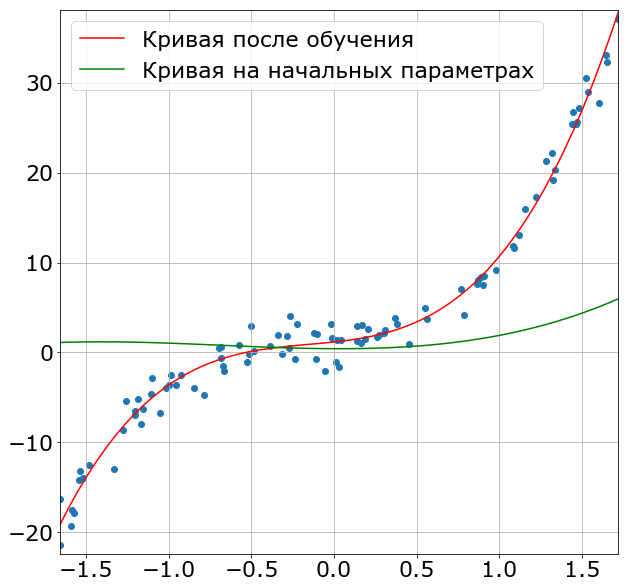

In [9]:
plot_poly_hw_results(X_m_ss, y, theta_init, theta_opt, means, stds)